# Machine Learning for Classification

## Machine Learning Classification Algorithms


There are many machine learning algorithms, and new algorithms are being created
all the time. Machine learning algorithms take input data and learn, fit, or train
during a training phase. Then we use the statistical patterns learned from the data to
make predictions during what is called "inference."
- Logistic Regression
- Naiver Bayes
- k-nearest neighbors (KNN)

The idea with these algorithms is that we give them labeled training data. This
means that we have our features (inputs) and a target or label (output). The target
should be a class, which could be binary (1 or 0) or multiclass (0 through the number
of classes). The numbers 0 and 1 (and others for multiclass classification) for the
target correspond to our different classes.

For binary classification, this can be
something like a payment default, approval to take a loan, whether someone will
click an ad online, or whether someone has a disease. For multiclass classification,
this might be something like a budget category for payments from your bank
account, the breed of a dog, or the emotion classification from a social media post
(for example, sad, happy, angry, or scared). Our inputs, or features, should have
some relationship with the target. For example, we might be interested in someone's
annual income and length of tenure at their current job if we are predicting if they
will default on a loan.

## Logistic Regression for Binary Classification


Logistic regression has been around for a while – since 1958. But don't let its
age fool you; sometimes the simplest algorithms can outperform more complex
algorithms, such as neural networks. Logistic regression is primarily used for binary
classification, although it can be used for multi-class classification as well. It's part of
a group of models called generalized linear models (GLMs), that also includes linear
regression.

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

data_path = r"C:\Users\INNO\Documents\Python Development\Practical Data Science\data\default of credit card clients.xls"

credit_df = pd.read_excel(data_path,
                         skiprows=1,
                         index_col=0 
                         )


# Preview the DF
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The Kaggle data page for
the dataset provides descriptions of the different columns in the dataset. There are
features for 6 months of data from April to August in 2005. The PAY columns (like
PAY_0) contain data on whether the payment was late for that month. The PAY_0
column is for payment for August 2005, the latest month in the dataset. Other
columns, such as BILL_AMT and PAY_AMT, contain the amount of the bill and
payment for the 6 months in the dataset. Other columns should be self-explanatory
from the column title.

In [3]:
# Running an Auto EDA with ProfileReport

report = ProfileReport(credit_df, interactions=None)

report.to_file("data\credit_data_Eda.html")

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Our target variable that we will be predicting is the "default payment next month"
column, and all other columns will be features. We can see from looking at the
correlations (for example, with df.corr().loc['default payment next month'])
that some of the features have a relationship to the target – the Pearson correlation is
around 0.1-0.3 for a handful of features, and the PAY features have a phik correlation
around 0.5 with the target. We won't do any data cleaning, feature selection, or
feature engineering yet. We can see from df.info() that there aren't any missing
values. Both the sklearn and statsmodels implementations of logistic regression
cannot handle missing values, so missing values need to be dealt with before using
the model.


To fit the logistic regression model, we need a set of training data broken down into
features and targets. We can create our features and targets like so:

In [4]:
train_features = credit_df.drop("default payment next month", axis = 1)

train_targets = credit_df["default payment next month"]

The first line drops the target column, keeping all other columns as features, and the
second column only keeps the target column in the train_targets variable. Let's use
the sklearn logistic regression implementation first:

In [7]:
from sklearn.linear_model import LogisticRegression


# Max Iter solves the warning problem
lr_sklearn = LogisticRegression(random_state=42, max_iter=1000)

lr_sklearn.fit(train_features, train_targets)

LogisticRegression(max_iter=1000, random_state=42)

All sklearn models work similarly. We first import the model class
(LogisticRegression here), and then instantiate it (the second line of code here).
When we create the model object, we can provide arguments to the class. For many
models, there is a random_state argument, which sets the random seed for random
processes. This will make our results reproducible if there are any random processes
in the algorithm. We have other arguments we can set, although we aren't doing
that yet. Once we have our initialized model object, we can train it on our data using
the fit() method. This is where the "machine learning" part comes in – the model
(machine) is learning from the data we give it. You will see that there is a warning
emitted when we run this code, talking about iterations reaching their limit. We will
explain more about what this means soon.

Once the model has fit to our training data, we can evaluate its performance on the
same data easily:

In [8]:
lr_sklearn.score(train_features, train_targets)

0.7787333333333334

The score() method of trained models calculates a default scoring metric. For
classification algorithms such as logistic regression, this is usually accuracy, which
is the number of correct predictions divided by the total number of data points. The
score() method returns 0.7788 here, so our accuracy is around 78%. `To understand
if that's any good, it helps to compare it to the majority class fraction, which we can
find from train_targets.value_counts(normalize=True). This shows us that the
class of 0 is 0.7788, so our model is doing no better than guessing that everything
is a "no default" label.`

In [9]:
# Normalize value_counts

train_targets.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

### Getting Predictions from our Model

In [11]:
predictions = lr_sklearn.predict(train_features)

predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

The data we give the predict() method must be a 2D array, so if we only predict
a single data point, we reshape it to be a 2D array with a single row:

In [15]:
lr_sklearn.predict((train_features.iloc[-1].values.reshape(1, -1)))

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [20]:
# Predict probability for the last row

lr_sklearn.predict_proba((train_features.iloc[-1].values.reshape(1, -1)))

C:\Users\INNO\Anaconda3\envs\practical_data_science_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.71715546, 0.28284454]])

The predict function returns a NumPy array of values for class labels. For binary
classification, this consists of 0s and 1s. If there are more than two classes, we will
have 0 through n-1 for the number of classes.

Instead of getting the exact class predictions, we can get probabilities for all the
predictions with predict_proba:

In [19]:
lr_sklearn.predict_proba(train_features)

array([[0.62009029, 0.37990971],
       [0.69758665, 0.30241335],
       [0.733449  , 0.266551  ],
       ...,
       [0.69538508, 0.30461492],
       [0.9559074 , 0.0440926 ],
       [0.71715546, 0.28284454]])

The first row shows the probability of class 0 is 0.54 (54%), and for class 1 is 0.46.
These probabilities sum to one for each row. We can use the probabilities to choose
a threshold for rounding our predictions. For example, the default threshold is >=0.5.
In other words, we are selecting the probabilities that each data point is 1 (the second
column), and then rounding it like so:

In [24]:
proba_predictions = lr_sklearn.predict_proba(train_features)[ :, 1]

proba_predictions = (proba_predictions >= 0.5).astype("int")

The proba_predictions >= 0.5 statement creates a Boolean array, so we convert
it back to an integer with astype('int'). Then we can check if this is equal to the
predict method with:

In [26]:
import numpy as np

predictions = lr_sklearn.predict(train_features)

np.array_equal(predictions, np.round(proba_predictions))

True

### Examining Feature Importances

We can roughly estimate the importance of features by comparing the absolute value
of the coefficients we find. We do need to scale our inputs before fitting the data with
our model (if they are in different units), for example, with StandardScaler. A bigger
coefficient means the feature is more "important" because it more strongly affects
the prediction. It's important to scale the features prior to doing this so they are
comparable (unless the features are all in the same units). We can scale our features,
fit the logistic regression model, and plot the feature importances like so:

([<matplotlib.axis.XTick at 0x1bc3f8308b0>,
 [Text(0, 0, 'PAY_0'),
  Text(1, 0, 'BILL_AMT1'),
  Text(2, 0, 'PAY_AMT1'),
  Text(3, 0, 'PAY_AMT2'),
  Text(4, 0, 'BILL_AMT2'),
  Text(5, 0, 'PAY_2'),
  Text(6, 0, 'BILL_AMT3'),
  Text(7, 0, 'LIMIT_BAL'),
  Text(8, 0, 'PAY_3'),
  Text(9, 0, 'MARRIAGE'),
  Text(10, 0, 'EDUCATION'),
  Text(11, 0, 'AGE'),
  Text(12, 0, 'PAY_AMT4'),
  Text(13, 0, 'SEX'),
  Text(14, 0, 'PAY_AMT5'),
  Text(15, 0, 'PAY_AMT3'),
  Text(16, 0, 'PAY_5'),
  Text(17, 0, 'BILL_AMT5'),
  Text(18, 0, 'PAY_AMT6'),
  Text(19, 0, 'PAY_4'),
  Text(20, 0, 'BILL_AMT6'),
  Text(21, 0, 'BILL_AMT4'),
  Text(22, 0, 'PAY_6')])

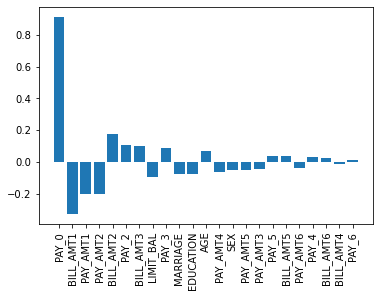

In [28]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()

scaled_features = scaler.fit_transform(train_features)

scaled_lr_model = LogisticRegression(random_state=42)

scaled_lr_model.fit(scaled_features, train_targets)

# Grab the coefficients
logit_coef = np.exp(scaled_lr_model.coef_[0]) -1

idx = abs(logit_coef).argsort()[::-1]

plt.bar(range(len(idx)), logit_coef[idx])

plt.xticks(range(len(idx)), train_features.columns[idx], rotation=90)

First, we import the scaler for standardizing the data and matplotlib for plotting.
Then we scale the features and fit a logistic regression model to this data. We use
the coef_ attribute of the model, indexing the first row with [0]. The coef_ array has
rows containing coefficients for each target variable and columns for each feature.
Since we only have one target variable, we only have one row. We exponentiate
Euler's number (e) to the coefficient values with np.exp() in order to get the odds
relationship to the target variable. We then subtract 1 from this value, since a value
of 1 for the exponentiated coefficient means there is no relationship to the target.
Values close to 0 in the logit_coef array then mean that there is little relationship
between that feature and the target, and the farther away from 0 the values are, the
more important the features to predicting the target.

Next, we use argsort() on the absolute values of our coefficients to get the index
values, and then reverse this array with [::-1] so that our coefficient values will
be greatest to least. Finally, we plot the odds coefficients and label them with the
column names. Our resulting feature importances look like this:

We can see that the most important feature is PAY_0, which is the number of months
late for the most recent month's payment in the dataset, with a positive relationship
to the target. Some other features from recent months have a negative relationship to
the target, meaning the larger the value, the smaller the chance of default. For PAY_0,
this makes intuitive sense – if a customer is late on their most recent payment, they
probably have a higher chance of not paying their bill next month. As we get beyond
the LIMIT_BAL feature, our odds ratios for features become very close to 1 (0 in the
plot above) for the most part. We can use these feature importances to prune away
some features by removing those with small coefficients or low relative importance.
Here, we might try removing everything from PAY_2 and smaller on the feature
importance plot, since the coefficient for PAY_2 has a large jump down in importance
from the BILL_AMT_2 feature.

This feature importance method can be useful for better understanding the data and
performing feature selection, and we'll see how it relates to other algorithms as well.
Another way to examine the significance of our coefficients is with a statistical test
that gives us p-values.

### Using statmodels for Logistic Regression

The sklearn package does not give us p-values, but the statsmodels implementation
of logistic regression does. It uses a likelihood ratio test to calculate these p-values. We can compare these
p-values to an alpha value (usually 0.05) to test for the significance of the result. If the
p-value is less than 0.05, we can say that our null hypothesis is rejected. For logistic
and linear regression, the null hypothesis is that the coefficients are no different from
0. So, if our p-values are less than 0.05 for coefficients, we can consider keeping those
coefficients and throwing out other coefficients with large p-values. The statsmodels
approach to modeling is slightly different, and works like so:

In [51]:
import statsmodels.api as sm
import numpy as np

np.random.seed(42)

lr_model = sm.Logit(train_targets, sm.add_constant(train_features))

lr_results = lr_model.fit()

lr_results.summary()

Optimization terminated successfully.
         Current function value: 0.464620
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29976
Method:                                   MLE   Df Model:                           23
Date:                        Sat, 09 Apr 2022   Pseudo R-squ.:                  0.1207
Time:                                15:04:57   Log-Likelihood:                -13939.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6863      0.119     -5.784      0.000      -0.919      -0.454
LIMIT_BAL  -7.623e-07   1.57e-07     -4.859      0.000   -1.07e-06   -4.55e-07
SEX           -0.1087      0.031     -3.541      0.000      -0.169      -0.049
EDUCATION     -0.1016      0.021     -4.844      0.000      -0.143      -0.060
MARRIAGE      -0.1544      0.032     -4.869      0.000      -0.216      -0.092
AGE            0.0074      0.002      4.170      0.000       0.004       0.011
PAY_0          0.5774      0.018     32.632      0.000       0.543       0.612
PAY_2          0.0828      0.020      4.103      0.000       0.043       0.122
PAY_3          0.0721      0.023      3.192      0.001       0.028       0.116
PAY_4          0.0239      0.025      0.956      0.339      -0.025       0.073
PAY_5          0.0340      0.027      1.266      0.206      -0.019       0.087
PAY_6          0.0080      0.022      0.363      0.716      -0.035       0.051
BILL_AMT1  -5.492e-06   1.14e-06     -4.835      0.000   -7.72e-06   -3.27e-06
BILL_AMT2   2.356e-06    1.5e-06      1.566      0.117   -5.92e-07     5.3e-06
BILL_AMT3   1.365e-06   1.32e-06      1.032      0.302   -1.23e-06    3.96e-06
BILL_AMT4  -1.821e-07   1.35e-06     -0.135      0.893   -2.83e-06    2.46e-06
BILL_AMT5   6.155e-07   1.52e-06      0.405      0.685   -2.36e-06    3.59e-06
BILL_AMT6   3.938e-07   1.19e-06      0.330      0.742   -1.95e-06    2.74e-06
PAY_AMT1   -1.363e-05   2.31e-06     -5.913      0.000   -1.81e-05   -9.11e-06
PAY_AMT2   -9.616e-06   2.09e-06     -4.590      0.000   -1.37e-05   -5.51e-06
PAY_AMT3   -2.742e-06   1.72e-06     -1.592      0.111   -6.12e-06    6.34e-07
PAY_AMT4   -4.023e-06   1.78e-06     -2.254      0.024   -7.52e-06   -5.25e-07
PAY_AMT5   -3.311e-06   1.78e-06     -1.864      0.062   -6.79e-06    1.71e-07
PAY_AMT6   -2.064e-06    1.3e-06     -1.593      0.111    -4.6e-06    4.76e-07
==============================================================================
"""

We first import the statsmodels package's api module with the alias sm – this is the
convention and how it is demonstrated in the statsmodels documentation. Then
we set a random seed with NumPy. We will see shortly how random processes are
used with logistic regression, but remember we also set a random seed with the
sklearn implementation. Next, we instantiate the Logit class from statsmodels,
giving it the targets as a first argument, and features second. Then we call the fit()
method of this object (lr_model), which is where the machine learning part happens.
This returns a new object with the results of the training, or fitting, process. 

In the upper-right column of the results, we have the number of observations, the
degrees of freedom for the residuals (difference between predictions and actual
values), the degrees of freedom for the model (number of coefficients minus 1), and
some metrics for the model. The first metric, pseudo R-squared, approaches 1.0 for
a perfect model (that perfectly predicts the data) and approaches 0 for a model that
does not have any predictive power (cannot predict better than always guessing the
majority class). Often, this value will be small and can be used to compare multiple
models. The next three metrics have to do with log-likelihood, which is an equation
we will cover shortly. It measures how well our model fits the data, and bigger is
better. The LL-Null term is the log-likelihood of the "null" model. The null model
is where we only use an intercept term (constant) in our logistic regression. Lastly,
the LLR p-value is the log-likelihood ratio statistical test. If our p-value is smaller
than a chosen alpha value (again, we usually compare this to an alpha value of 0.05),
then the LLR test tells us that our model is statistically significantly better than the
null model.

>There is also another summary function, summary2(). This shows
most of the same information, but also includes AIC and BIC.
These are information criteria (IC). AIC is the Akaike Information
Criterion, and BIC is the Bayesian Information Criterion. Both are
better when smaller and can be used to compare models on the
same dataset. Smaller is always better for IC – IC have an additive
penalty term for the number of features, so the same accuracy with
fewer predictors will have smaller IC values.

Next, we have rows for each of our features (also called exogenous variables,
independent variables, or covariates). The coef column shows the coefficient value
for the logistic regression equation, followed by the standard error (an estimate of
the standard deviation), a z-value from a Wald test, a p-value from the same test, and
95% confidence intervals (we expect the coef value to lie within these bounds 95%
of the time when fitting to samples of the data). We can use the p-values to select
features by only keeping features where p < 0.05:

In [42]:
selected_features = sm.add_constant(train_features.loc[ :, (lr_results.pvalues < 0.05)])

lr_model_trimmed = sm.Logit(train_targets, selected_features)

lr_trimmed_results = lr_model_trimmed.fit()

lr_trimmed_results.summary()

Optimization terminated successfully.
         Current function value: 0.465728
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29988
Method:                                   MLE   Df Model:                           11
Date:                        Sat, 09 Apr 2022   Pseudo R-squ.:                  0.1186
Time:                                14:39:28   Log-Likelihood:                -13972.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3661      0.088     -4.146      0.000      -0.539      -0.193
LIMIT_BAL  -8.283e-07   1.51e-07     -5.469      0.000   -1.13e-06   -5.31e-07
SEX           -0.1218      0.030     -4.012      0.000      -0.181      -0.062
EDUCATION     -0.0892      0.021     -4.341      0.000      -0.130      -0.049
MARRIAGE      -0.2091      0.029     -7.136      0.000      -0.267      -0.152
PAY_0          0.5921      0.018     33.763      0.000       0.558       0.626
PAY_2          0.0837      0.020      4.199      0.000       0.045       0.123
PAY_3          0.1193      0.018      6.489      0.000       0.083       0.155
BILL_AMT1  -1.751e-06   2.64e-07     -6.630      0.000   -2.27e-06   -1.23e-06
PAY_AMT1   -1.176e-05   2.08e-06     -5.649      0.000   -1.58e-05   -7.68e-06
PAY_AMT2   -8.234e-06   1.79e-06     -4.594      0.000   -1.17e-05   -4.72e-06
PAY_AMT4   -4.455e-06   1.55e-06     -2.876      0.004   -7.49e-06   -1.42e-06
==============================================================================
"""

First, we generate a pandas DataFrame for our statsmodels-ready features with
sm.add_constant(train_features). Then we select all rows and columns where the
p-values are less than 0.05 with loc. We can fit the model and evaluate metrics with
summary() and summary2(). From this, we see the performance of the model is nearly
the same as the model with all features. So, we can use our model on fewer features
(12 plus a constant term) instead of the model on the full set of features. If model
performance is nearly the same with fewer features, it's better to choose the simpler
model to minimize overfitting concerns and to minimize required resources.

With statsmodels, we have a predict function just like with sklearn. This can be
used from our results object:

In [43]:
lr_trimmed_results.predict(selected_features)

ID
1        0.551270
2        0.148310
3        0.203144
4        0.237579
5        0.118267
           ...   
29996    0.147306
29997    0.104594
29998    0.848566
29999    0.172756
30000    0.260281
Length: 30000, dtype: float64

It returns a pandas series of predicted probabilities that the class is 1. We can round
this up based on a threshold like so:

In [45]:
predictions = (lr_trimmed_results.predict(selected_features) < 0.5).astype("int")

predictions

ID
1        0
2        1
3        1
4        1
5        1
        ..
29996    1
29997    1
29998    0
29999    1
30000    1
Length: 30000, dtype: int32

>This will give us a pandas series of binary values that can be compared directly
to the 0 and 1 targets. We can use this with metrics such as accuracy:

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, predictions)

0.19113333333333332

With many sklearn metrics like this one, we provide the true values as the first
argument and predicted values as the second argument. However, it's always best
to check the documentation to be sure. We find our accuracy is around 81% (0.8091),
which is a little better than the sklearn model.
You may have noticed that the coefficients, as well as the accuracy score from the
sklearn and statsmodels logistic regression models, are different. This primarily
has to do with two settings: the optimization algorithm and regularization. To
understand the optimization algorithm, let's look at how logistic regression finds
its parameters.

In [49]:
sm.add_constant(train_features)

,const,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,1.0,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,1.0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,1.0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,1.0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,1.0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,1.0,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


### Maximum Likelihood Estimation, Optimizers, and the Logistic Regression Algorithm


Logistic regression uses an iterative optimization process to calculate the coefficient
for each feature and intercept. As we saw from statsmodels, it is also using
something called maximum likelihood estimation, or MLE. This MLE process relies
on a likelihood function, which we are trying to maximize. 

Now that we have our log-likelihood or loss function, we can use it to fit our model
with the logistic regression algorithm. To get the parameters (coefficients) for our
logistic regression, we first initialize them to a value (for example, coefficients are
initialized to 0 by default in statsmodels). Then we calculate predictions for our
targets from the logistic regression equation and calculate the value of the likelihood
function. Next, we change the parameters so that the likelihood function moves
toward 0. We can do this with various optimizers. One that you will see with other
algorithms (such as neural networks) is gradient descent. However, several other
optimizers can be used. All of them change the parameters (coefficients) so that
the log-likelihood function is optimized (maximized in our case, moving the loglikehood
value toward 0). Maximizing the log-likelihood function by changing
parameters is like letting a balloon rise to the center of a dome if the balloon is
our model and the dome is the likelihood surface over all possible parameters.
The mathematics of the optimizers gets complex and we will not delve into it, but
we can change these optimizers as a parameter of our sklearn and statsmodels
functions. To recap, the logistic regression algorithm is:
- Initialize Coefficients
- Predict target values (y-hat values for each data point)
- Compute the log-likelihood or loss function
- Use an optimizer to update the co-efficients so that the loss function is minimized
- Repeat until the change in loss function is sufficiently small

With the statsmodels logistic regression fit method, the argument for the optimizer
is method. By default, it's newton for the Newton-Raphson optimizer. We can also
set a maxiter argument for the maximum number of iterations the optimizer will
undergo. If we see a warning with ConvergenceWarning: Maximum Likelihood
optimization failed to converge., we can try other optimizers and/or increase
the maxiter argument to see whether we can get the model to converge.

With sklearn we can use the newton-cg method, which we specify with the solver
argument. This is not exactly the same as the default Newton-Raphson method used
in statsmodels, but is close. We also need to increase the max_iter argument so that
the algorithm can converge:

`lr_sklearn = LogisticRegression(solver='newton-cg', max_iter=1000)
lr_sklearn.fit(train_features, train_targets)
`

However, we still get warnings here about the line search algorithm (our optimizer)
not converging. The coefficients are more similar to the statsmodels results, so
it seems it came close to converging and there may be a bug or peculiarity in the
sklearn code, causing these warnings to show up with newton-cg. We can see from
lr_sklearn.n_iter_ that 185 iterations were undertaken, less than our limit of 1000 –
so it seems it should've converged. Interestingly, the statsmodels newton solver only
takes 7 iterations to converge.

Another difference between the default logistic regression settings in sklearn and
statsmodels is regularization

### Regularization

Regularization adds a penalty term to the log-likelihood function (also called our
loss function). This penalty term moves the log-likelihood values further from 0 as
coefficients get larger. There are three primary ways of enacting regularization with
logistic regression: L1 (also called Lasso), L2 (also called Ridge), and Elastic Net (L1 +
L2) regularization. Regularization prevents overfitting and gives us a dial to tune the
bias-variance trade-off for our model.


For usual log-likelihood, L1 regularization subtracts the term (lambda * sum(abs(b)) the absolute value of a coefficient and gamma (.... ) is a constant value we choose.
Some implementations use negative log-likelihood, and we flip all the signs (so the
regularization term would be added instead of subtracted). As we saw earlier, bigger
coefficients mean a feature has a bigger influence on the target. If we have a lot of
big coefficients, we may be fitting to noise in the data rather than the actual patterns.
With L1 regularization, some coefficients can be regularized down to 0, providing
some feature selection for us.


L2 regularization uses the penalty term (lambda * sum(abs(b)^2)
which results in shrinking coefficients but not reducing them to 0. Elastic Net combines the two. When using regularization, it's important to scale our features since the penalty terms penalize
the raw magnitude of the coefficients. The only exception to this, as with PCA and
logistic regression feature importances, is if our features are in the same units – then
we might consider not scaling them.

In sklearn, the penalty argument specifies the regularization method. By
default, it uses L2 regularization. There is also a C argument, which is the inverse
of the regularization strength – so a larger C value means less regulation. The
documentation for the LogisticRegression class describes these parameters, and
also states which solvers (optimizers) can be used with the different penalty terms
(there are restrictions). If we set the value of C to a smaller number than the default
of 1 and use L1 regularization, we can force some coefficients to be 0:

In [52]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(train_features)

lr_sklearn = LogisticRegression(penalty="l1", solver="liblinear", C=0.01)

lr_sklearn.fit(scaled_features, train_targets)

lr_sklearn.coef_

array([[-0.09177091, -0.03149387, -0.04190868, -0.05807321,  0.04759691,
         0.6387541 ,  0.09262123,  0.09002068,  0.02370525,  0.03696442,
         0.00536184, -0.11607406,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.12242634, -0.09716088, -0.0206883 ,
        -0.03081571, -0.02785315, -0.01939507]])

We first standardize the data in preparation with StandardScaler as we've done
before, and then set the value of C to 0.01 for a strong regularization effect. After
fitting the model, we can see that the BILL_AMT features 2-6 have been regularized to
0. We could consider dropping these features going forward, especially since they
also had large p-values from the statsmodels results.

To use regularization with statsmodels, we use the fit_regularized() method
of Logit objects:

In [53]:
scaled_features_df = pd.DataFrame(
        scaled_features,
        columns=train_features.columns,
        index=train_features.index
)


lr_model = sm.Logit(train_targets, sm.add_constant(scaled_features_df))

reg_results = lr_model.fit_regularized(alpha=100)

reg_results.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47567931369409666
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Sat, 09 Apr 2022   Pseudo R-squ.:                  0.1187
Time:                                15:57:23   Log-Likelihood:                -13970.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4080      0.016    -88.843      0.000      -1.439      -1.377
LIMIT_BAL     -0.0918      0.020     -4.634      0.000      -0.131      -0.053
SEX           -0.0315      0.015     -2.122      0.034      -0.061      -0.002
EDUCATION     -0.0419      0.016     -2.600      0.009      -0.074      -0.010
MARRIAGE      -0.0581      0.016     -3.562      0.000      -0.090      -0.026
AGE            0.0476      0.016      2.933      0.003       0.016       0.079
PAY_0          0.6387      0.020     32.484      0.000       0.600       0.677
PAY_2          0.0926      0.024      3.869      0.000       0.046       0.139
PAY_3          0.0901      0.027      3.384      0.001       0.038       0.142
PAY_4          0.0237      0.029      0.821      0.412      -0.033       0.080
PAY_5          0.0370      0.030      1.230      0.219      -0.022       0.096
PAY_6          0.0053      0.025      0.214      0.831      -0.044       0.054
BILL_AMT1     -0.1160      0.019     -6.130      0.000      -0.153      -0.079
BILL_AMT2           0        nan        nan        nan         nan         nan
BILL_AMT3           0        nan        nan        nan         nan         nan
BILL_AMT4           0        nan        nan        nan         nan         nan
BILL_AMT5           0        nan        nan        nan         nan         nan
BILL_AMT6           0        nan        nan        nan         nan         nan
PAY_AMT1      -0.1224      0.028     -4.330      0.000      -0.178      -0.067
PAY_AMT2      -0.0972      0.033     -2.974      0.003      -0.161      -0.033
PAY_AMT3      -0.0207      0.022     -0.919      0.358      -0.065       0.023
PAY_AMT4      -0.0308      0.021     -1.455      0.146      -0.072       0.011
PAY_AMT5      -0.0278      0.020     -1.378      0.168      -0.067       0.012
PAY_AMT6      -0.0194      0.020     -0.955      0.339      -0.059       0.020
==============================================================================
"""

First, we create a pandas DataFrame from our NumPy array of scaled data. We also
need to set the column names when creating the DataFrame as well as the index.
This is so that we will have the column names from our DataFrame in our summary
report. The targets and features must have the same index if they are DataFrames
or Series.

Once we create our model object, we fit it and specify the regularization strength
with the alpha parameter. Larger values mean more regularization, and this is the
same as 1/C from the sklearn model. These values may be somewhere around 0.001
to 100. Once we fit the model and examine the report, we can see that the same five
features have been regularized to 0 – BILL_AMT features 2-6.

Regularization is a handy tool to prevent overfitting, but choosing the optimal
C requires some iteration. We could do this with a for loop, but an easier way is
to use pre-built cross-validation tools.

### Hyperparameters and Cross-Validation


The C parameter in the sklearn logistic regression and the alpha value in the
statsmodels implementation are called hyperparameters. These are settings for the
model that we choose. By contrast, parameters are the coefficients that the model
learns. This gets confusing because in Python programming, a parameter is also
a setting we provide to a function or class, also called an argument. `So, the C value
is a parameter in Python programming parlance and a hyperparameter in machine
learning terminology.`


For now, we can easily perform a hyperparameter search for the C parameter with the
LogisticRegressionCV class in sklearn. This uses cross-validation, which breaks the
data up into train and validation (or test) sets. For example, we could use 75% of our
data for our model training and keep 25% as a validation set. We fit the model to the
training set, and then calculate the accuracy or other metrics on the validation set.

*Cross-validation (CV)* does this several times so that we train on and evaluate every
part of the dataset as train and test. For example, we can use 3-fold cross-validation,
which divides the data into thirds. We first fit to the first two-thirds of the data and
evaluate the last third. Then we fit the model from scratch on the last two-thirds of
the data and evaluate on the first third.

Finally, we train on the first and last thirds, and evaluate on the middle third. Then
we average the scores obtained on the three validation sections to get our score
for that hyperparameter setting. We can change the hyperparameter settings and
repeat the CV process and keep the hyperparameter settings with the highest score.

We will obtain three validation scores, which we then average to get an overall cross-validation score on the dataset for one algorithm with one set of hyperparameters. We can perform this for a range of
hyperparameters (for example, C values) and choose the hyperparameters with the
best validation score.

>For some models in sklearn such as logistic regression, this is made easy with a CV
class. We can perform cross-validation on our data to find the optimal C value like so:

In [55]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100],
                             solver="liblinear",
                             penalty="l1",
                             n_jobs=-1,
                             random_state=42
                            )

lr_cv.fit(scaled_features, train_targets)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], n_jobs=-1, penalty='l1',
                     random_state=42, solver='liblinear')

First, we import the LogisticRegressionCV class. Then, we initialize it with several
parameters: the list of C values we want to try (Cs), along with the solver and
penalty arguments. We are using the L1 penalty here so that we may be able to
remove some features. Since only the liblinear and saga solvers work with L1
(as described in the documentation for the LogisticRegressionCV class), we are
specifying the liblinear solver. We also set the n_jobs parameter to -1, which tells
sklearn to use all available CPU cores in parallel to run the cross-validation process.
This is a common argument we will see in other sklearn functions. Lastly, we set
random_state, which affects how the liblinear solver works and will provide more
reproducible results.

In [56]:
# Best C Value

lr_cv.C_

array([1.])

We can also look at the cross-validation scores with lr_cv.scores_.
To get the average validation set score for each value of C, we can do the following:

In [59]:
lr_cv.scores_[1].mean(axis=0)

array([0.78556667, 0.80863333, 0.8094    , 0.80996667, 0.80993333,
       0.80993333])

This returns an array the same length as our number of C values and shows us the
score was around 81% (0.81) for the value of C=1.

### Logistic regression (and other models) with big data

Often, we'll find that we may encounter big data in our work and need a way to
deal with it. Both sklearn and statsmodels can be adapted to work with big data.
For example, statsmodels has a DistributedModel class that could be used, though
examples of how to use it are lacking. For sklearn, the dask Python package can
be used (with an example here: https://examples.dask.org/machine-learning/incremental.html). However, one simple and quick fix (although not ideal) to
dealing with big data is to sample the data down to something that can be handled
on a single machine. But for actually using all the data, there are several other Python
packages available that can perform logistic regression on big datasets:

- Vowpal Wabbit
- H2O
- TensorFlow
- Dask
- Spark (pyspark)

> H2O can also be used for logistic regression on a single machine
or scale up to a cluster. A small example is shown in the code for
this chapter on this book's GitHub repository. Some advantages of
H2O for ML are that it can handle missing values and non-numeric
values (for example, strings) gracefully. It also has convenience
methods for plotting the feature importances from ML models
(which H2O calls "variable importances").
Logistic regression has a page in H2O's documentation here,
with examples in Python: https://docs.h2o.ai/h2o/lateststable/
h2o-docs/data-science/glm.html#examples.
However, the R documentation tends to be more organized and
easier to read: https://docs.h2o.ai/h2o/latest-stable/
h2o-r/docs/reference/h2o.glm.html.
Most, if not all, of the R and Python function names and arguments
are the same with H2O.

## Naive Bayes for Binary Classification


With the Naïve Bayes model, we predict the
probability of a class by multiplying conditional probabilities along with the prior
probability of each class, P(y). There are a few different Naïve Bayes classifiers in sklearn. All are used for
classification, but take different types of features:


- BernoulliNB – binary features (1s and 0s)
- CategoricalNB – discrete, non-negative categorical features (for example, onefeature could contain 0s, 1s, and 2s)
- ComplementNB – takes non-negative categorical and numeric features; similar to MultinomialNB, but better for imbalanced datasets where the distribution of targets is not uniform
- GaussianNB – takes any numeric features; assumes the likelihood of features (the P(xi|y) terms) is Gaussian
- MultinomialNB – takes non-negative categorical and numeric features

With our data, we can try using GaussianNB. However, we can easily see our features
and target are not normally distributed, so we could guess this algorithm won't do
too well. We can fit it and check the score like so:

In [60]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()

gnb.fit(train_features, train_targets)

gnb.score(train_features, train_targets)

0.378

As with all sklearn algorithms, we first import it, and then initialize the model
object. Then we fit the model to the training features and targets and can evaluate the
score. Our score is only 37.8% accuracy, which is not great – far worse than guessing
the majority class.

These Naïve Bayes models have the predict() and predict_proba() functions that
work the same as with the logistic regression class (we simply provide the features
to the prediction functions). The Naïve Bayes models also have a partial_fit()
method, where we can provide part of the data at a time for the model to update its
parameters. In this way, we can handle bigger data or streaming data by fitting it a
little bit at a time.

One way to use the Naïve Bayes models is for text classification. For example, if we
want to categorize text as positive or negative, we could use the multinomial Naïve
Bayes classifier with word counts.

### k-nearest neighbors

This is a
distance-based algorithm. If we want to predict the class of a data point, we take the
nearest k points to our data point (measured by distances between features of the
points) and take a weighted average of the classes of the nearest points to make our
prediction. KNN is different from other ML algorithms because there is no training
– we only store our data, and then calculate the distances upon evaluation to make
predictions. We can easily use KNN in sklearn, but we want to make sure to scale
our features before using it:

In [63]:
numeric_columns = ["LIMIT_BAL"] + [f"BILL_AMT{i}" for i in range(1, 7)] + [f"PAY_AMT{i}" for i in range(1, 7)]

categorical_columns = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0"] + [f"PAY_{i}" for i in range(2, 6)]


scaler = StandardScaler()


scaled_numeric_features = scaler.fit_transform(train_features[numeric_columns])


scaled_features = pd.concat(
                [pd.DataFrame(data=scaled_numeric_features, columns=numeric_columns, index=credit_df.index),
                train_features[categorical_columns]],
                axis=1
                )

First, we create lists of our numeric and categorical features. Then we use
StandardScaler to scale the numeric features. Finally, we join the two sets of features
back together using pd.concat(). We create a DataFrame out of our scaled features,
providing the column names and the index from the original DataFrame so that our
DataFrame merges properly. Then we can fit the KNN model:

In [64]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_jobs=-1)

knn.fit(scaled_features, train_targets)

knn.score(scaled_features, train_targets)

0.8456666666666667

First, we import the class as usual with sklearn models and then instantiate it.
The n_jobs=-1 argument specifies that we should use all available processers for
calculating distances, which speeds up the runtime. There are other arguments
available for the distance calculations. By default, it uses the Euclidean distance,
which is the straight-line distance between points. We can set the argument p=1 in
KNeighborsClassifier() to use the Manhattan or city block distance, which tends
to work better for higher-dimensional data (with many features).


Instead of a straight-line distance between points, the Manhattan distance is the
distance between two points measured along axes at right angles (orthogonal). It
looks like traversing through the downtown area of a city (for example, Manhattan
in New York City) via car. An example of Manhattan distance is shown in Figure
11.6. The Manhattan distance will be a larger value than the Euclidean distance.


>Both the Euclidean and Manhattan distances are derived from
the Minkowski distance (https://en.wikipedia.org/wiki/
Minkowski_distance).


KNN is very easy to understand and implement. The main hyperparameters we
can tune are the number of neighbors (the n_neighbors argument), the weighting
of nearby points for calculating the predicted class (weights), and the distance
calculation (p and metric). The easiest way to search these is to simply optimize the
n_neighbors argument.


Our accuracy on the training set for this model is 0.8463 (84%), which is not bad for such
a simple model, and actually looks better than our logistic regression models so far.
In fact, our accuracy improves a little after scaling/standardizing all the features
with sklearn's StandardScaler. Without scaling, our accuracy on the training dataset
is 81.7%. However, we do need to be careful when evaluating accuracy on the same
data we trained on. If our model is overfitting to the data (fitting to noise in the data),
we may see a very high accuracy on the training data, but low accuracy on new data.


The sklearn documentation has explanations and examples for its functionality. For
example, the KNN examples and explanation can be found here: https://scikitlearn.
org/stable/modules/neighbors.html#nearest-neighbors-classification. 
- Store our training data in memory
- To make a prediction, compute distances using a distance metric between
the new data point and existing data points (there are multiple ways of doing
this; the brute-force method is to compute all distances)
- Take the k nearest points and take an average or weighted average to arrive at our 𝑦𝑦𝑦 value

## Multiclass Classification

In multiclass classification, we have three or more classes in our target. This is also
called multinomial classification. All classifiers in sklearn can perform multiclass
classification, and there are a few other multiclass classification tools in sklearn.

### Logistic Regression

Let's use the same logistic regression model as before, but using PAY_0 as our target:

In [67]:
pay_0_target = credit_df["PAY_0"].replace({i: 1 for i in range(1, 9)})
pay_0_features = credit_df.drop(["PAY_0", "default payment next month"], axis=1)

lr_multi = LogisticRegression(max_iter=100000)
lr_multi.fit(pay_0_features, pay_0_target)

LogisticRegression(max_iter=100000)

First, we create a pandas series with the PAY_0 column as a target. This has values
-2 through 8 for different categories of payments (-2 is "no consumption", -1 is paid
on time, 0 is the use of revolving credit, and 1-8 is the number of months late on
payment). We convert any value from 1 through 8 to the value 1 to simplify the
classes – with this change, 1 signifies a late payment. Then we create a set of features
without our target column and without the binary default column. We can use
the sklearn LogisticRegression class on this with no modifications, although we
increased the max_iter argument so that our model can fully fit the data (it takes
228 iterations to converge, greater than the default max_iter of 100). With other
classification models in sklearn, we can also simply give it a multi-class target and
use the classifier as usual.

The multinomial logistic regression algorithm carries out the same logistic regression
equation as before, but on k classes. There are multiple ways to formulate the
equations for solving for the coefficients and predictions for class probabilities,
but we end up with the same result – a probability for each class, where the sum of
probabilities for each prediction sums to 1. For example, we might end up with a
vector of probability predictions that looks like [0.25, 0.25, 0,5] for the probability of
3 different classes from multinomial logistic regression. With sklearn, the logistic
regression coefficients are an array of shape (n_classes, n_features + 1). The +1 is
for the intercept term.

>The loss function used for multi-class logistic regression is the
same as the binary case (cross-entropy) but is generalized to
multiple classes. The sklearn documentation shows the exact
equation for this: https://scikit-learn.org/stable/modules/
model_evaluation.html#log-loss.

We can also use the MNLogit class from statsmodels, which gives us the coefficients
for k-1 of the classes:

In [68]:
multi_sm = sm.MNLogit(pay_0_target, sm.add_constant(pay_0_features))
multi_sm_results = multi_sm.fit()
multi_sm_results.summary()

Optimization terminated successfully.
         Current function value: 0.762369
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  PAY_0   No. Observations:                30000
Model:                        MNLogit   Df Residuals:                    29931
Method:                           MLE   Df Model:                           66
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                  0.3754
Time:                        19:21:11   Log-Likelihood:                -22871.
converged:                       True   LL-Null:                       -36618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
  PAY_0=-1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7368      0.328     26.622      0.000       8.094       9.380
LIMIT_BAL  -1.051e-06   2.92e-07     -3.596      0.000   -1.62e-06   -4.78e-07
SEX           -0.1590      0.072     -2.223      0.026      -0.299      -0.019
EDUCATION     -0.2542      0.044     -5.838      0.000      -0.339      -0.169
MARRIAGE      -0.0991      0.073     -1.351      0.177      -0.243       0.045
AGE            0.0074      0.004      1.684      0.092      -0.001       0.016
PAY_2          4.2855      0.114     37.478      0.000       4.061       4.510
PAY_3         -0.4013      0.079     -5.059      0.000      -0.557      -0.246
PAY_4          0.2645      0.088      3.013      0.003       0.092       0.437
PAY_5          0.1763      0.088      2.005      0.045       0.004       0.349
PAY_6          0.3368      0.070      4.840      0.000       0.200       0.473
BILL_AMT1  -1.451e-05      2e-06     -7.256      0.000   -1.84e-05   -1.06e-05
BILL_AMT2   -3.93e-05   3.27e-06    -12.005      0.000   -4.57e-05   -3.29e-05
BILL_AMT3  -8.032e-06   3.09e-06     -2.600      0.009   -1.41e-05   -1.98e-06
BILL_AMT4   2.279e-06   2.89e-06      0.789      0.430   -3.38e-06    7.94e-06
BILL_AMT5   -1.86e-06   3.16e-06     -0.589      0.556   -8.05e-06    4.33e-06
BILL_AMT6   -7.21e-06   2.64e-06     -2.734      0.006   -1.24e-05   -2.04e-06
PAY_AMT1    3.423e-05   3.06e-06     11.201      0.000    2.82e-05    4.02e-05
PAY_AMT2      3.8e-06   1.92e-06      1.975      0.048    2.95e-08    7.57e-06
PAY_AMT3    4.261e-07   2.74e-06      0.156      0.876   -4.94e-06    5.79e-06
PAY_AMT4     3.94e-07   2.84e-06      0.139      0.890   -5.17e-06    5.96e-06
PAY_AMT5    6.995e-08   2.96e-06      0.024      0.981   -5.72e-06    5.86e-06
PAY_AMT6   -2.944e-06   1.65e-06     -1.780      0.075   -6.19e-06    2.98e-07
------------------------------------------------------------------------------
   PAY_0=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9797      0.333     26.930      0.000       8.326       9.633
LIMIT_BAL  -4.532e-06   3.07e-07    -14.777      0.000   -5.13e-06   -3.93e-06
SEX           -0.2313      0.073     -3.155      0.002      -0.375      -0.088
EDUCATION     -0.0285      0.044     -0.651      0.515      -0.115       0.057
MARRIAGE       0.0287      0.075      0.383      0.702      -0.118       0.176
AGE           -0.0047      0.004     -1.053      0.292      -0.014       0.004
PAY_2          3.8719      0.114     33.887      0.000       3.648       4.096
PAY_3         -0.2820      0.079     -3.553      0.000      -0.438      -0.126
PAY_4          0.4448      0.088      5.082      0.000       0.273       0.616
PAY_5          0.2042      0.088      2.321      0.020       0.032       0.377
PAY_6          0.4338      0.070      6.226      0.000       0.297       0.570
BILL_AMT1   7.103e-06   1.76e-06      4.039      0.000    3.66e-06    1.05e-05
BI

We can get predictions from this model with multi_sm_results.predict(sm.add_
constant(pay_0_features)), which again are probabilities for each class, and sum
to 1 for each data point.

This multinomial logistic regression technique relies on an assumption of
independence of irrelevant attributes (IIA), which says the probability of preferring
one class over a second class shouldn't depend on another "irrelevant" class.

In our case, this assumption holds, but an example where this does not hold is if we
have a perfect substitute for another class. For example, if our 0 value of PAY_0 (using
revolving credit) had a perfect substitute, such as another class with a value of -3 that
involved using nearly identical revolving credit, this IIA assumption would not hold,
and our logistic regression results may not be reliable.

This implementations of multinomial logistic regression can be thought of as fitting
k-1 binary logistic regression models against each class versus the last class, which
is why statsmodels returns k-1 sets of coefficients for k classes. However, there are
a few other multiclass modeling strategies: one-versus-rest and one-versus-one.

### One-versus-rest and one-versus-one formulation

The one-versus-rest (OVR) and one-versus-one (OVO) formulations of
multinomial classification are slightly different. OVR formulates the problem so
each class is fit against all other classes in a binary classification problem, giving
us k models for k classes. An advantage of OVR is that it's easy to interpret – each
model has the coefficients or parameters for that single class versus all others.
The OVO implementation creates a model for each pair of classes, and results in
k * (k – 1) / 2 models. These models are not as easy to interpret as OVR or the
default implementation from sklearn models, but OVO can provide an advantage
for algorithms that don't scale well with the number of samples (for example, KNN
when using the brute-force distance calculation approach). The OVO gets predictions by taking the
majority vote for the predicted class from all its classifiers.

> To use OVR with logistic regression, we can set the multi_class argument to 'ovr':

In [69]:
lr_multi_ovr = LogisticRegression(max_iter=1000, multi_class="ovr")

This keeps the same logistic regression object and interface that we've used before.
Another method that is general to any model is to use other classes from sklearn:

In [70]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier


lr_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
lr_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)


lr_ovr.fit(pay_0_features, pay_0_target)
lr_ovo.fit(pay_0_features, pay_0_target)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

Here, we import the OVO and OVR classes from sklearn and simply wrap our
logistic regression algorithm with these classes. We can then use the same fit,
predict, and some other methods that we used before. The predict_proba is not
available to the OVO model, however. We are setting the n_jobs argument to -1 in
order to use all available processors. We can also get each individual model like so:

In [71]:
lr_ovo.estimators_[0]

LogisticRegression(max_iter=1000)

This gives us the first logistic regression model out of 6 models. There are 4 classes
(-2, -1, 0, 1) and the pairs of targets for the models follow a pattern: the first class
is paired with the next classes in a row, then the second class is paired with the
following classes in a row, and so on. This gives us the pairs: (-2, -1), (-2, 0), (-2, 1),
(-1, 0), (-1, 1), and 1, and (0, 1). With the individual models, we can access any of the
models' attributes and methods, such as predict_proba.

Models in sklearn will tend to use the best implementation for each algorithm, OVR,
or OVO. However, we can always try the different implementations for algorithms
and see which works best.

### Multi-label Classification

Some classification problems can have multiple labels for each target. For example,
if we are classifying the topic of a news story, it might fall under several categories
at the same time (a news story could be about both economics and politics, for
example). Classifiers for multilabel problems (which we could also call multitarget)
are multi-output classifiers by definition. We can use the PAY columns in our default
dataset to create a multilabel classification problem:

In [76]:
import swifter


mo_targets = credit_df[["PAY_0"] + [f"PAY_{i}" for i in range(2, 7)]].copy()

mo_targets = mo_targets.swifter.apply(lambda x: (x > 0).astype(int), axis=1)

mo_features = credit_df.drop(["PAY_0", "default payment next month"], axis=1)

Here, we retrieve the PAY columns from our original DataFrame and make a copy
(so as not to alter the original DataFrame or have any SettingwithCopyWarning
warnings from pandas). We then apply the function across rows (with axis=1),
which returns 1 if the value is greater than 0, and 0 otherwise. This gives us 1s for
each of the PAY columns where there was a late payment, and 0 otherwise. We use
the swifter package to parallelize the apply function.


Some sklearn models can handle multi-label data out of the box – for example, treebased
models such as DecisionTreeClassifier, as well as KNN. However, many
other models cannot handle this, and we must use another sklearn class:

In [77]:
from sklearn.multioutput import MultiOutputClassifier


mo_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
mo_clf.fit(mo_features, mo_targets)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

Here, we import and use the MultiOutputClassifier class, which behaves nearly
identically to the OVO and OVR classes. We give it an estimator as the first argument
and tell it to use all available processors with the n_jobs=-1 argument. Then we can
use similar methods as before, such as predict, predict_proba, and score. This class
fits an individual model for each target, and stores the models in the estimators_
attribute of our mo_clf variable.

Another similar method is the ClassifierChain class from sklearn. This fits
individual models for each class, but fits them sequentially. It first fits a model to the
first target value, and then sequentially fits models for the other target values using
the actual value (in training) or predicted value (during inference or prediction) of
the class from the previous model. We can use this model like so:

In [79]:
from sklearn.multioutput import ClassifierChain

cc_clf = ClassifierChain(LogisticRegression(max_iter=100000))

cc_clf.fit(mo_features, mo_targets)

ClassifierChain(base_estimator=LogisticRegression(max_iter=100000))